In [3]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [7]:
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [13]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
df['target']=iris.target
df[0:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [18]:
X=df.drop('target',axis='columns')
y=df.target

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [20]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=40)

In [21]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
model.score(X_test,y_test)

0.9666666666666667

In [24]:
y_predict=model.predict(X_test)
y_predict

array([1, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1])

In [25]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_predict)
mat

array([[ 9,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 13]], dtype=int64)

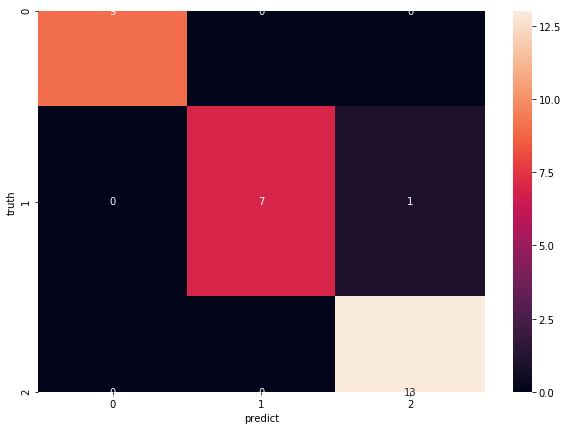

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(mat,annot=True)
plt.xlabel('predict')
plt.ylabel('truth')
plt.show()